# Binomial Logistic Regression

## Load the data

Load Customer Churn dataset from kaggle, [link to the dataset](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load the Drive helper and mount prompting authorization. This block also imports the pandas library
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_data = pd.read_csv('/content/drive/My Drive/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
df_data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Clean the data

In [6]:
# Change total_charges from object to numeric
# errors=coerce for error handling, ignoring errors
df_data.TotalCharges = pd.to_numeric(df_data.TotalCharges, errors='coerce')

## Handling null data

In [7]:
df_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
# Drops the null rows
df_data.dropna(inplace=True)

## Delete ID

In [10]:
df_data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
# Drop the ID since it is not relevant for the model
df_data.drop('customerID',axis=1,inplace=True)

In [12]:
df_data.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Cast to numeric the goal variable Churn

In [13]:
# We turn it numeric since it works better with the model
df_data['Churn'].replace(to_replace='Yes', value = 1, inplace=True)
df_data['Churn'].replace(to_replace='No', value = 0, inplace=True)

df_data['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

In [14]:
# Makes a copy of d_data
df_data_processing = df_data.copy()

## Categoric Variable Handling with onehot encoding

In [15]:
# Get dummies from the variables of the data set
df_data_processing = pd.get_dummies(df_data_processing)
df_data_processing.head(5)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


## Correlation Analysis

In [16]:
import matplotlib.pyplot as plt

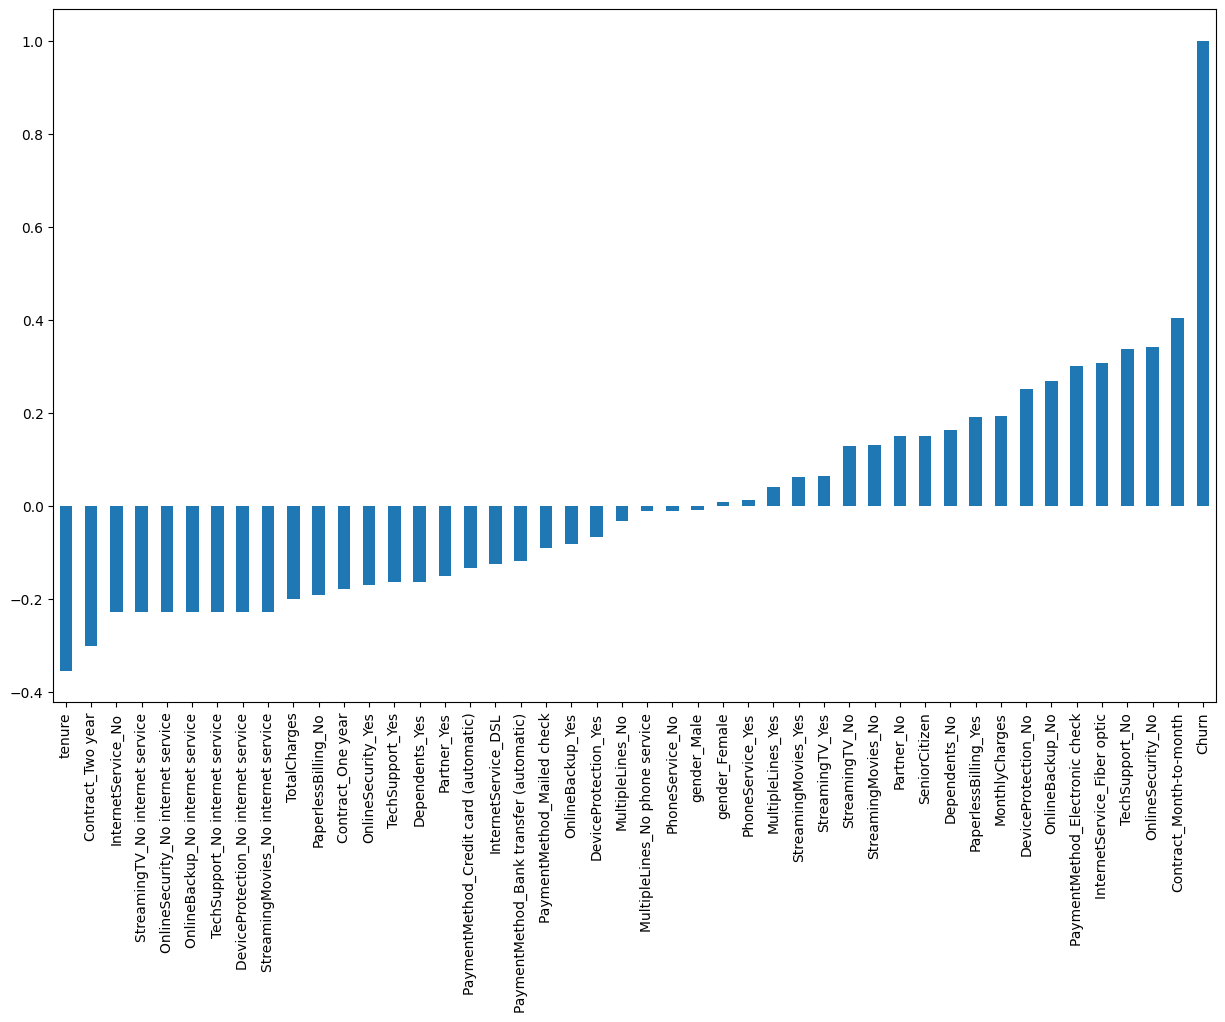

In [17]:
fig = plt.figure(figsize=(15,9))
# We sort the values in ascending order to search a correlation
df_data_processing.corr()['Churn'].sort_values(ascending=True).plot(kind='bar')
plt.show()

## Scaling the data

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
# Applying the min max scaler to the data
scaler = MinMaxScaler()
df_data_processing_scaled =  scaler.fit_transform(df_data_processing)

In [20]:
df_data_processing_scaled = pd.DataFrame(df_data_processing_scaled)

In [21]:
# We take the original columns names
df_data_processing_scaled.columns = df_data_processing.columns

In [22]:
df_data_processing_scaled.head(5)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.000000,0.115423,0.001275,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.464789,0.385075,0.215867,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.014085,0.354229,0.010310,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.619718,0.239303,0.210241,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.014085,0.521891,0.015330,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## Data analysis

In [23]:
import seaborn as sns

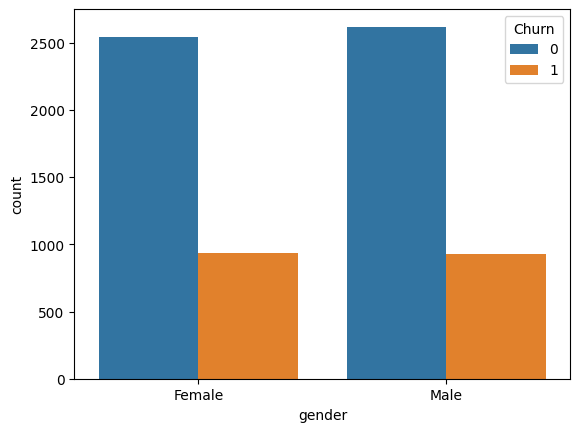

In [24]:
# Draws a count plot counting Churn divided by gender
sns.countplot(data=df_data, x='gender',hue='Churn')
plt.show()

In [25]:
# Function to draw a count plot of an specific column
def plot_categorial(column):
    fig = plt.figure(figsize=(10,10))
    sns.countplot(data=df_data, x=column,hue='Churn')
    plt.show()

In [26]:
# We get the categorial columns only
column_cat = df_data.select_dtypes(include='object').columns

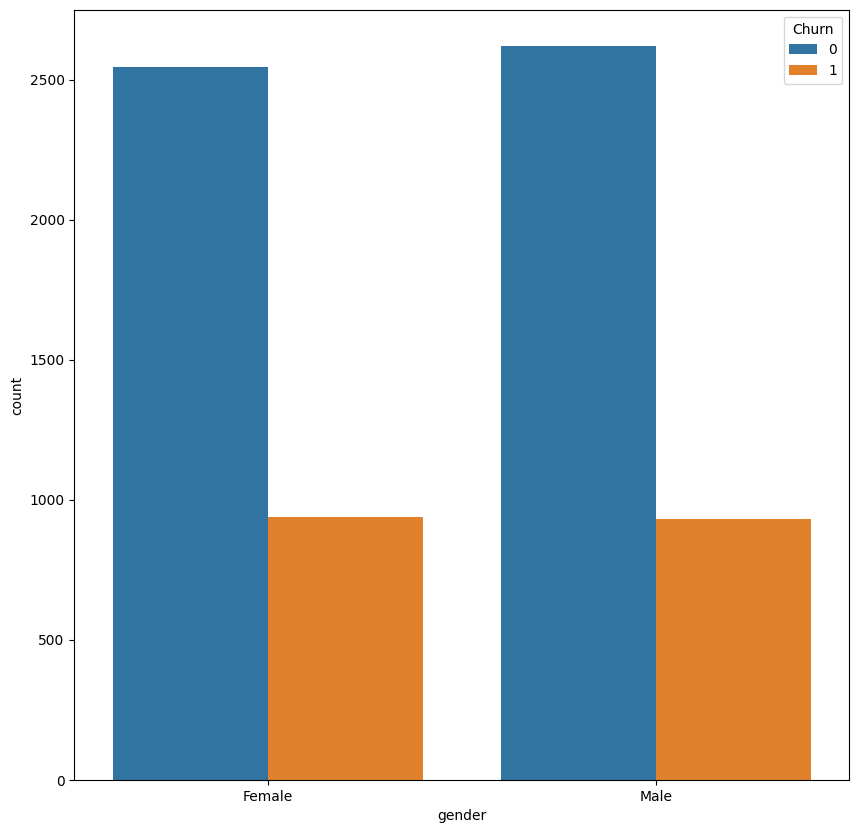

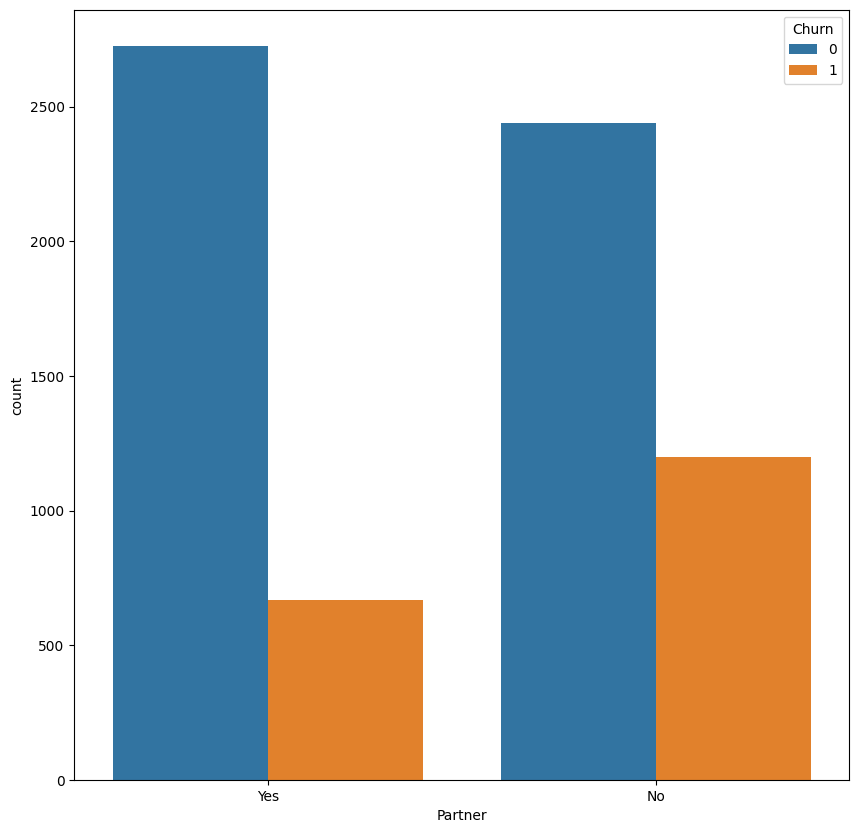

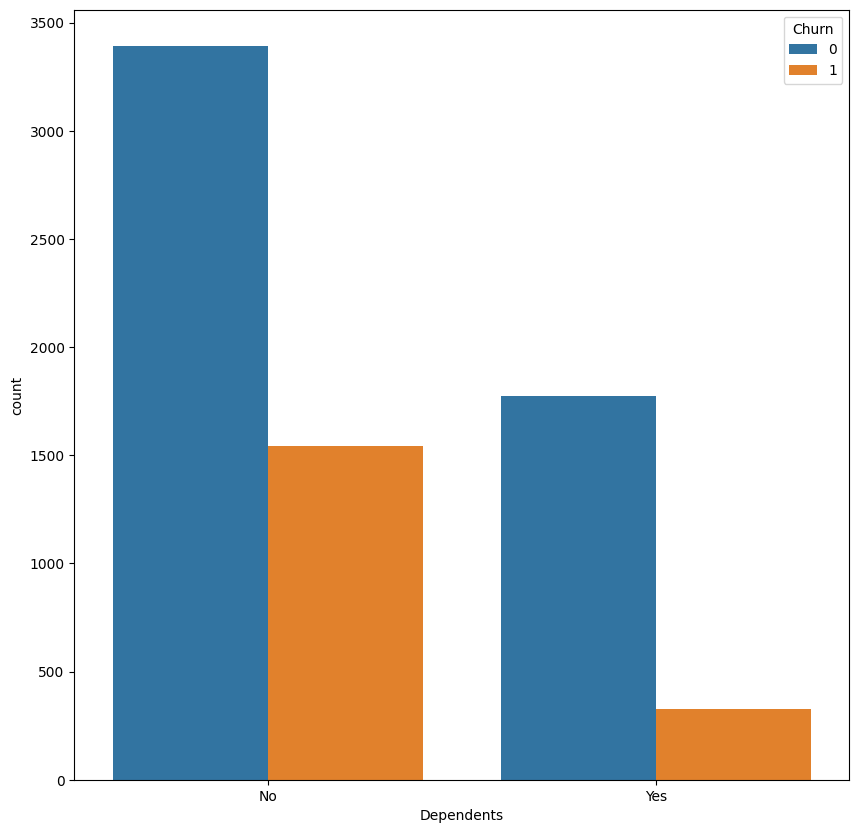

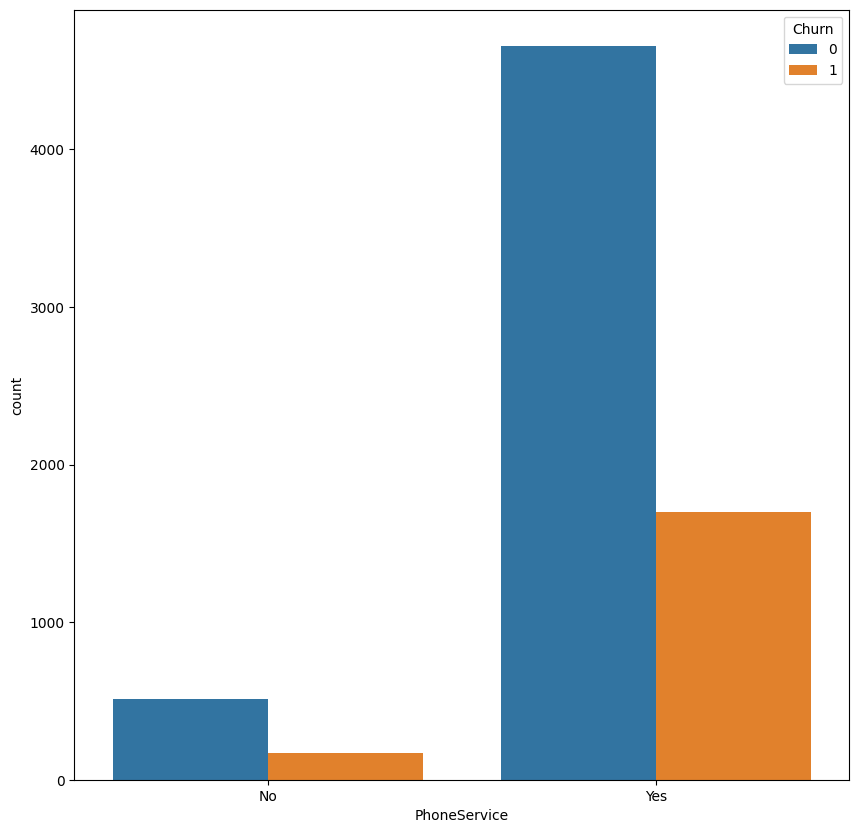

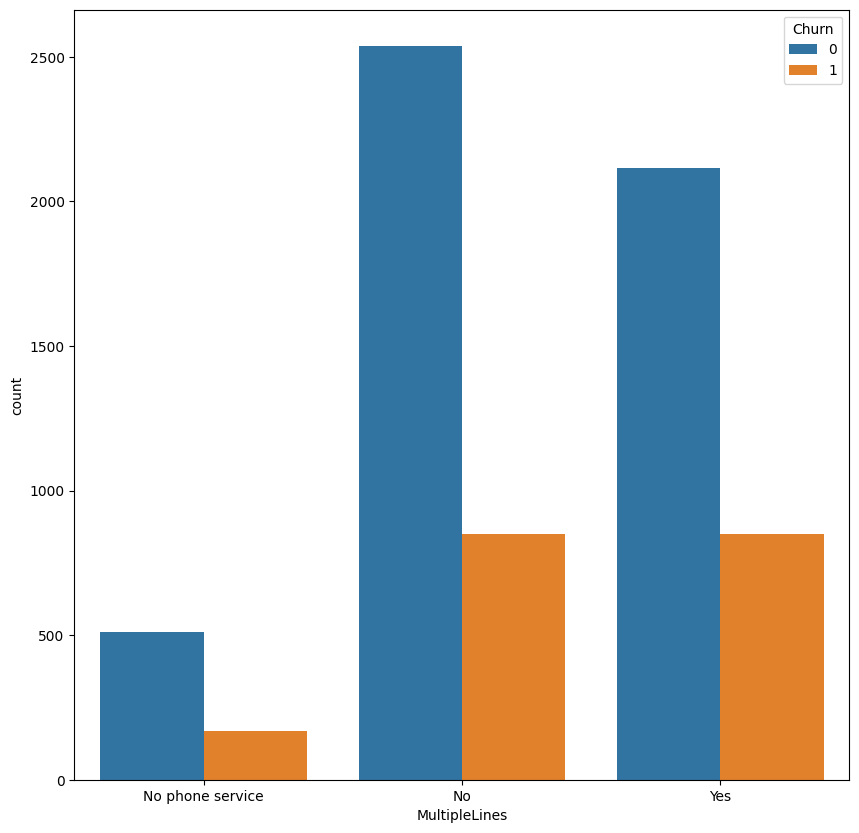

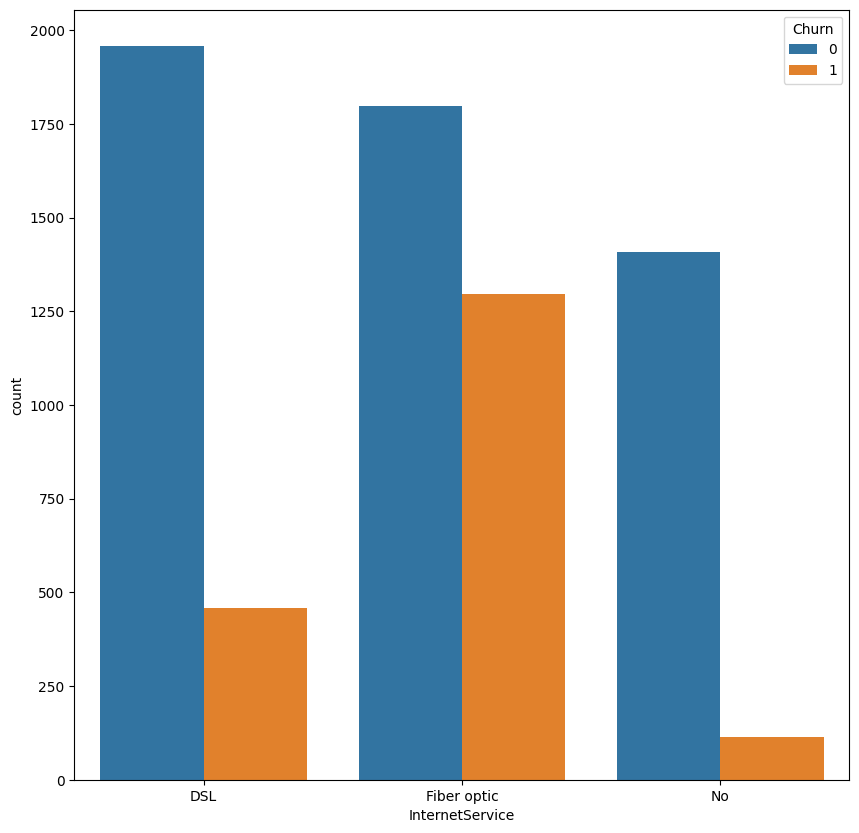

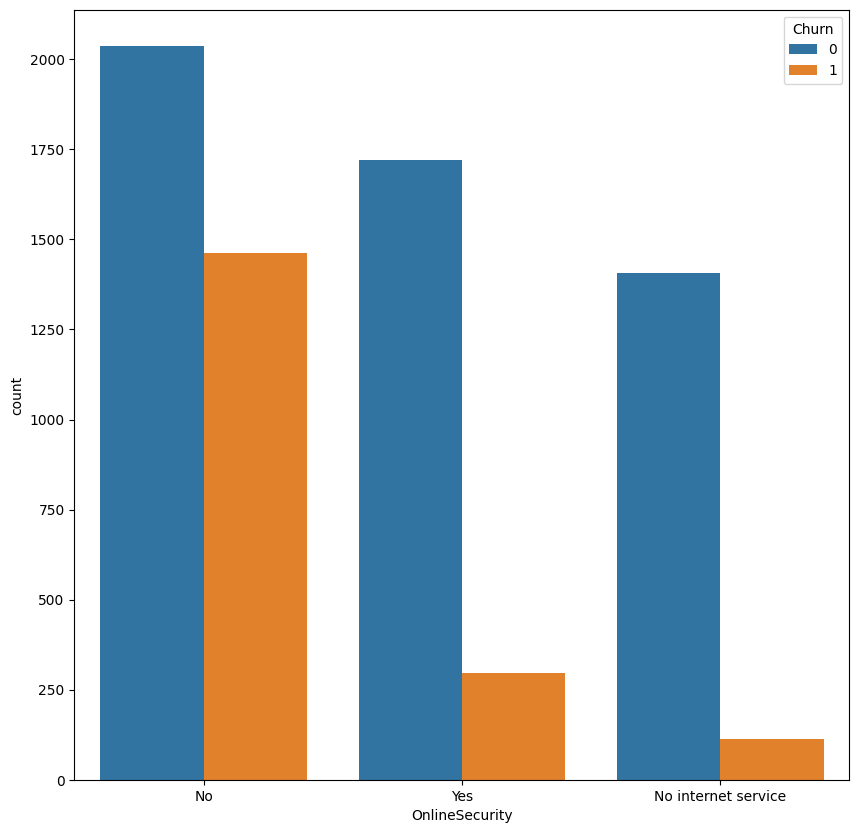

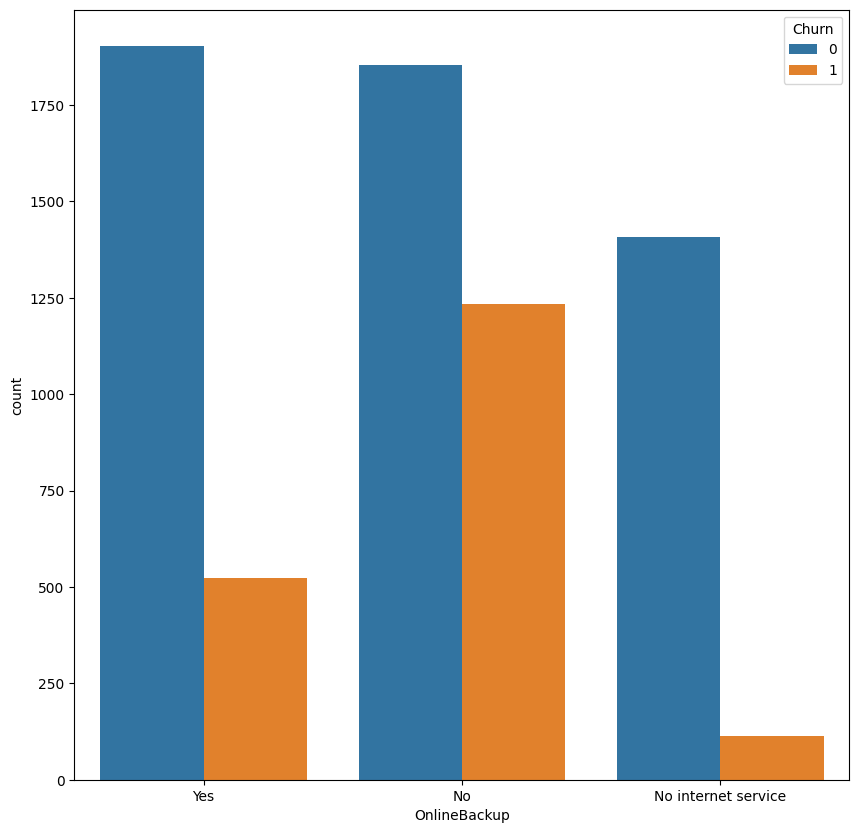

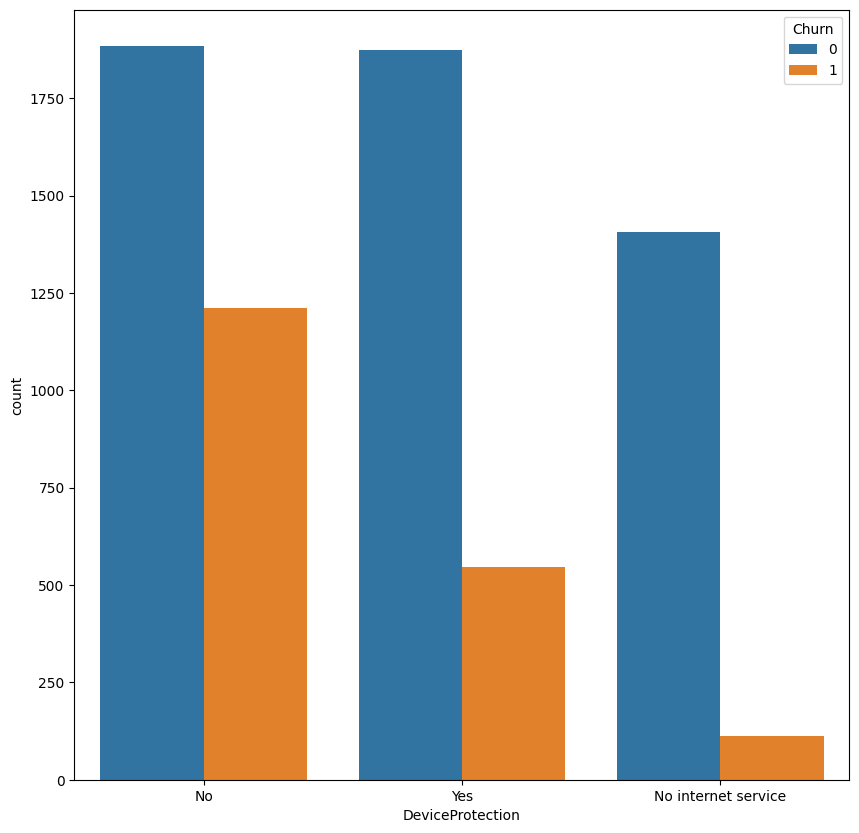

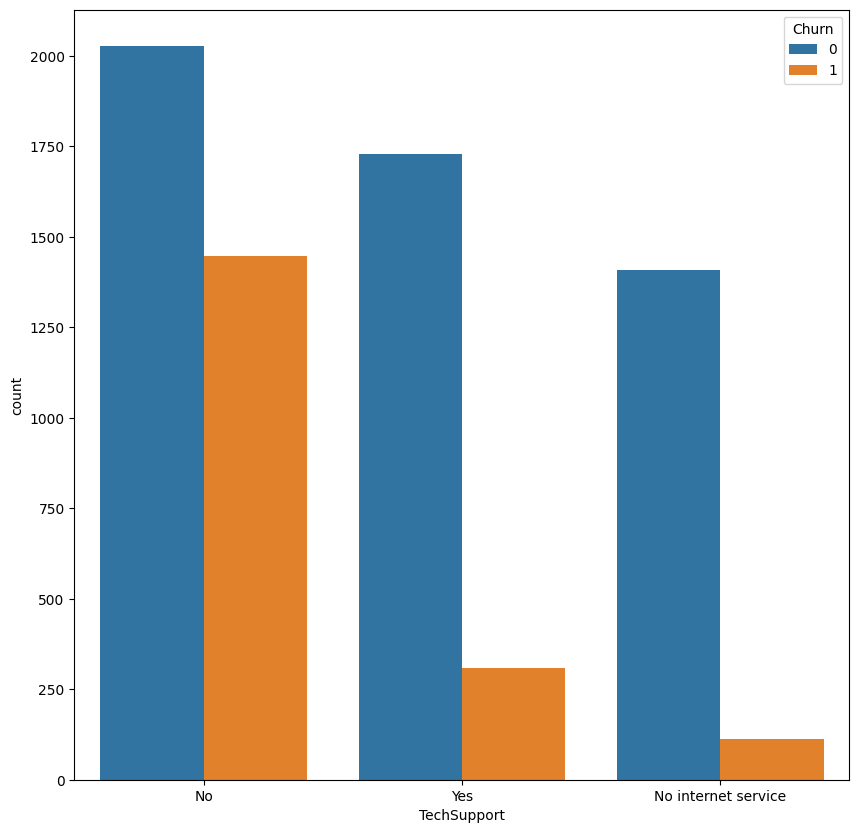

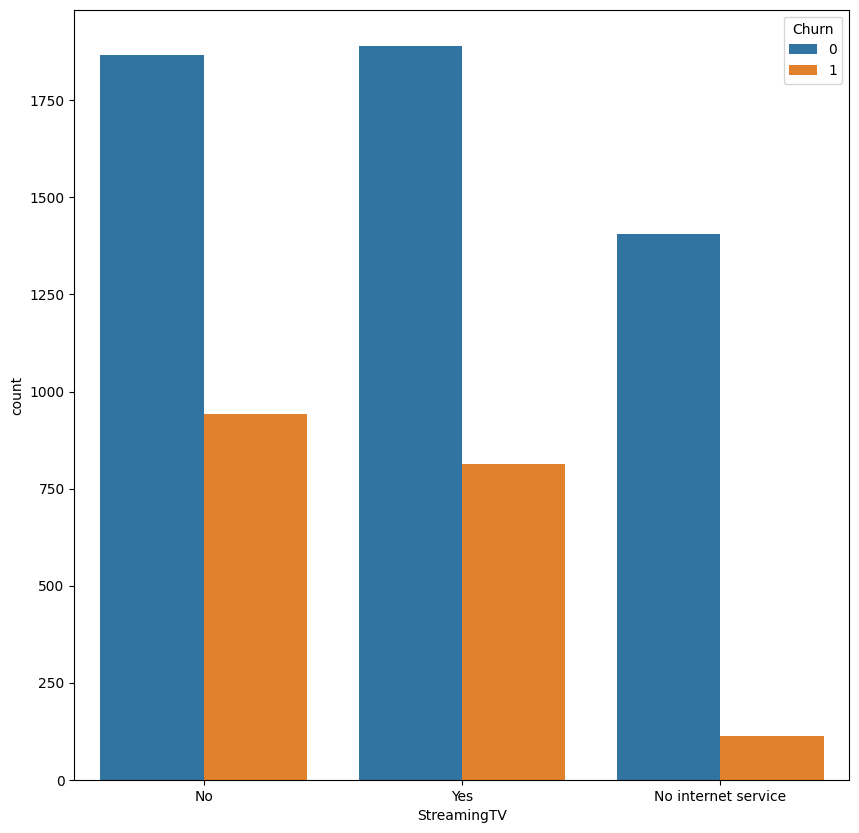

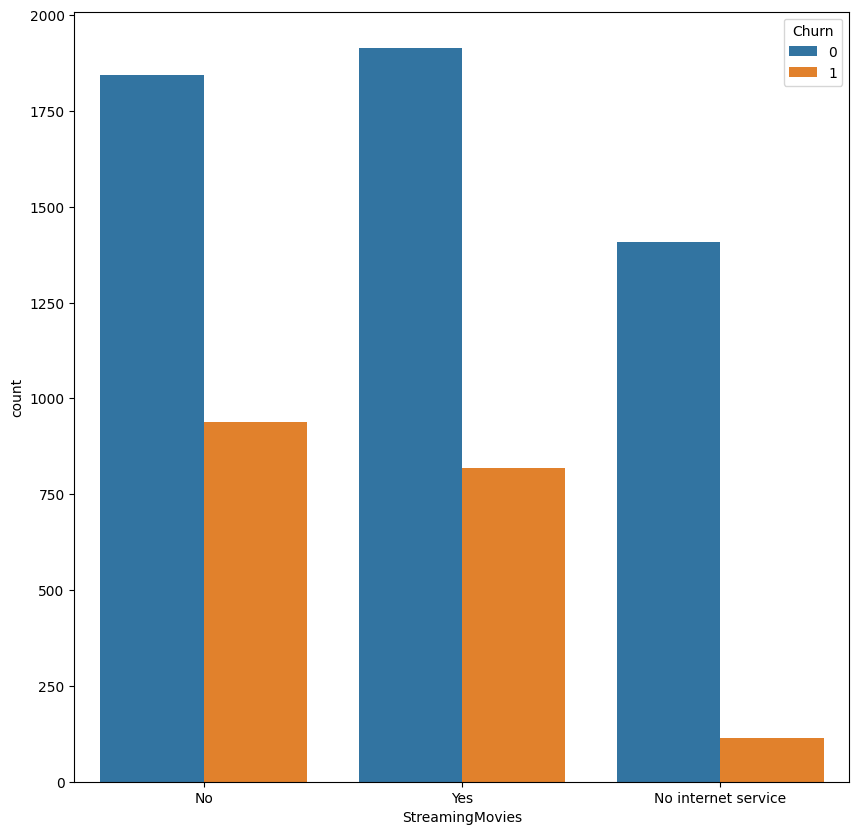

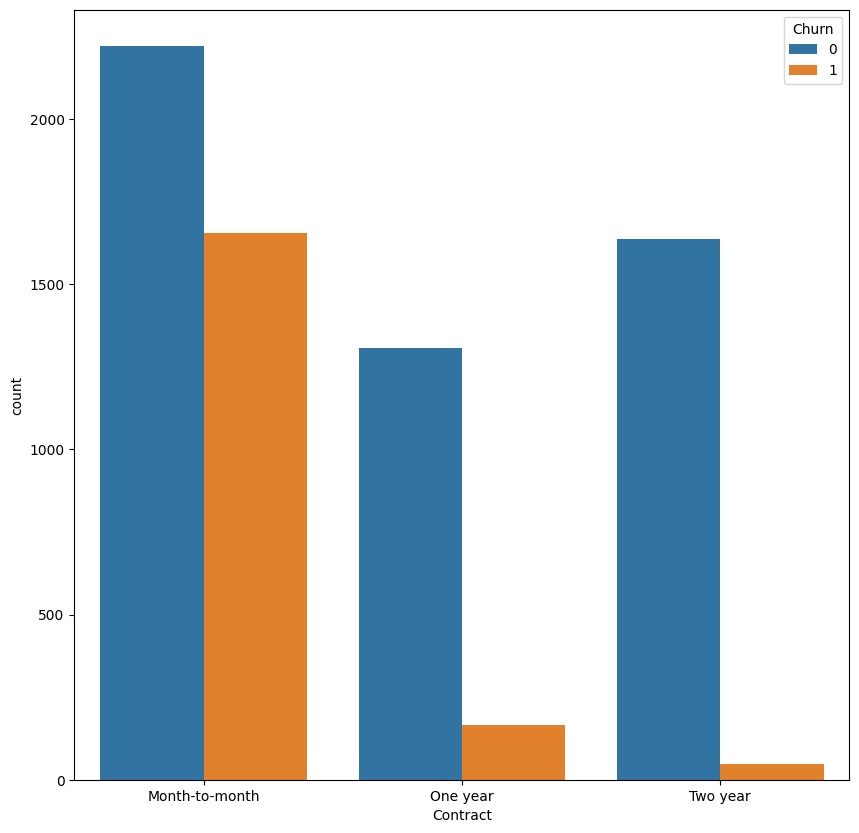

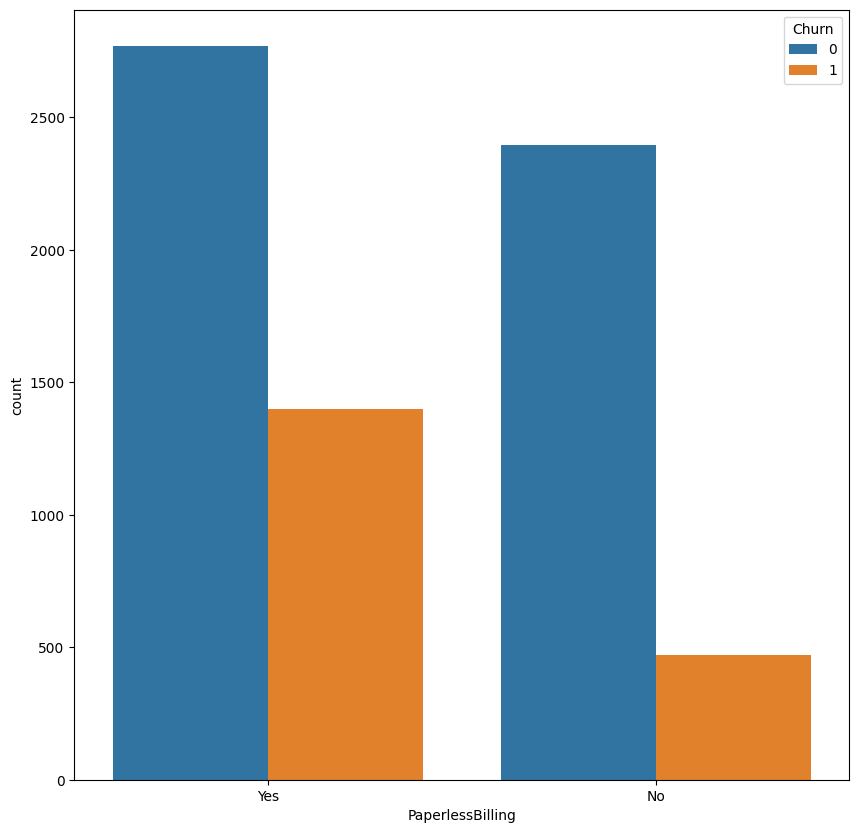

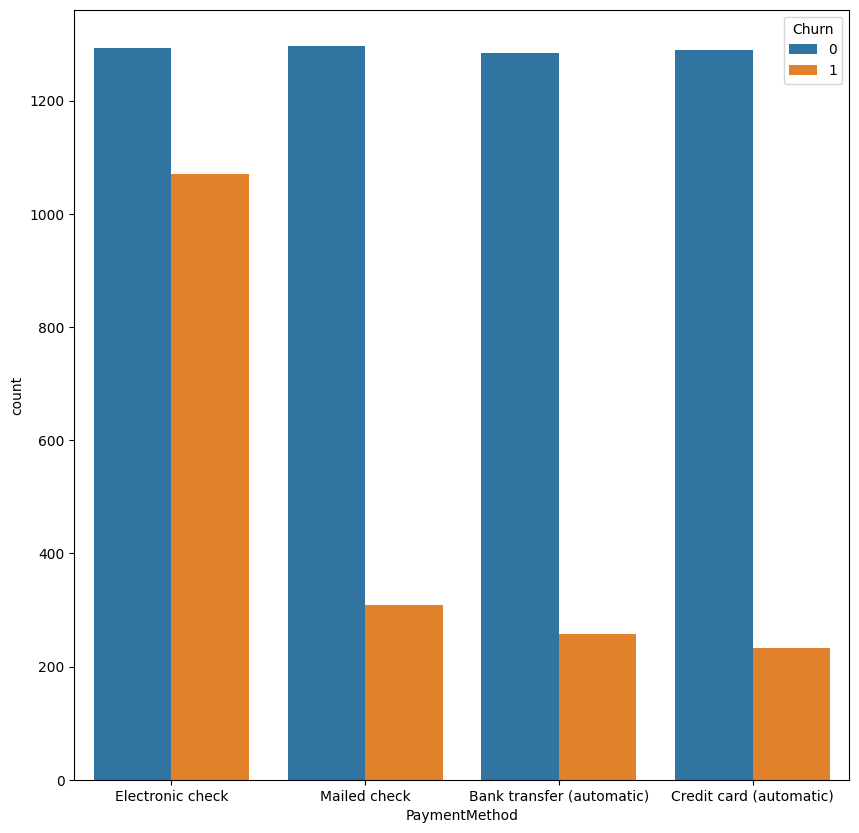

In [27]:
# Loop to draw the count plot with the categorical columns
for column in column_cat:
    plot_categorial(column)

<Figure size 1000x1000 with 0 Axes>

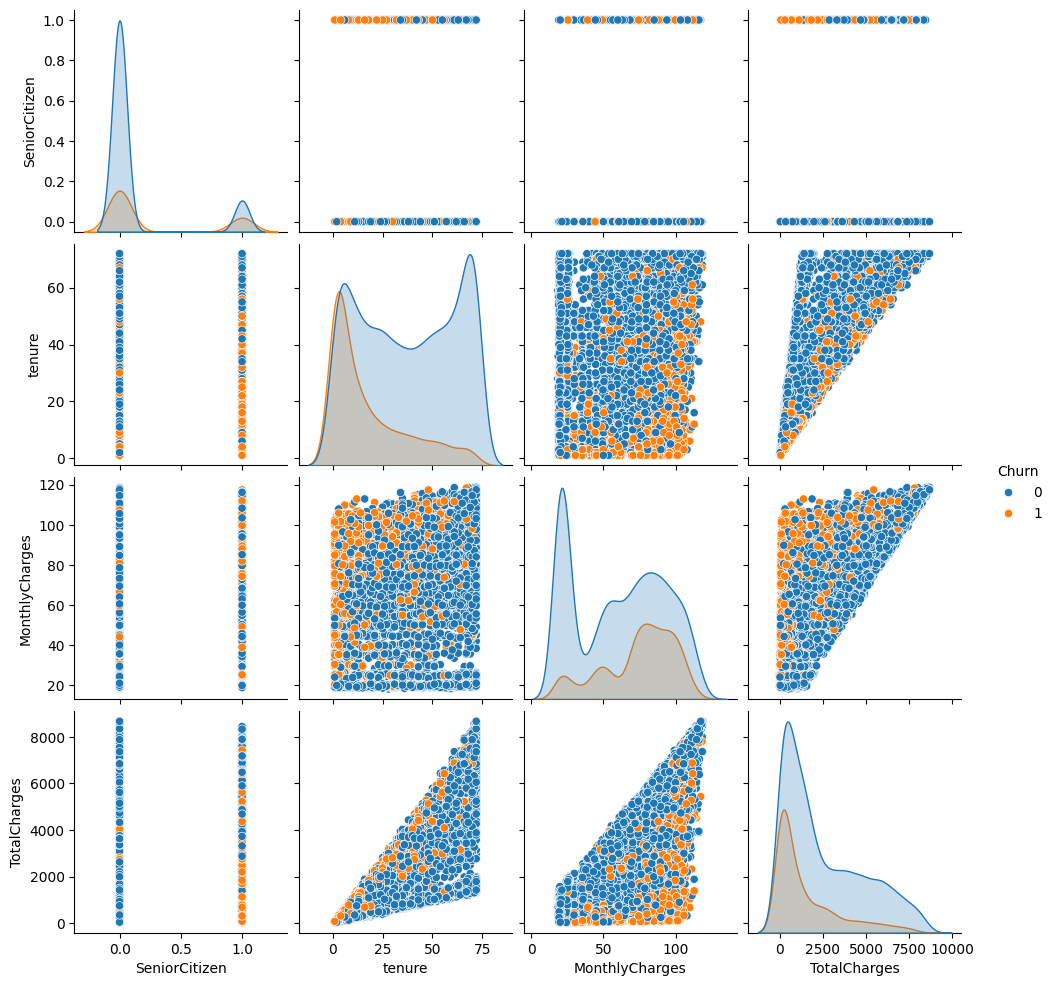

In [28]:
# Now we analyse the numeric columns, the numeric columns
fig = plt.figure(figsize=(10,10))
sns.pairplot(data= df_data, hue='Churn')
plt.show()

## Training the binomial logistic regression model

In [59]:
X = df_data_processing_scaled.drop('Churn',axis=1)
y = df_data_processing_scaled['Churn'].values

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [61]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
result = model.fit(X_train, y_train)

In [62]:
from sklearn import metrics
# We use metrics to evaluate the prediction
prediction_test = model.predict(X_test)
print(metrics.accuracy_score(y_test,prediction_test ))

0.795734597156398


## Evaluation of the model

In [33]:
# Predicts the probability of X_test
model.predict_proba(X_test)

array([[0.99026948, 0.00973052],
       [0.86177921, 0.13822079],
       [0.30147193, 0.69852807],
       ...,
       [0.99036349, 0.00963651],
       [0.70107319, 0.29892681],
       [0.82854851, 0.17145149]])

In [34]:
# Gets the coeficients, importance
model.coef_

array([[ 0.21797363, -3.11259197, -0.16370646,  1.20639601,  0.01148919,
        -0.01171479, -0.06125617,  0.06103058,  0.12783536, -0.12806096,
         0.09419086, -0.09441646, -0.15366874,  0.09419086,  0.05925228,
        -0.41044232,  0.51837155, -0.10815483,  0.24669763, -0.10815483,
        -0.1387684 ,  0.09080355, -0.10815483,  0.01712569,  0.06327785,
        -0.10815483,  0.04465138,  0.22752341, -0.10815483, -0.11959418,
        -0.07898103, -0.10815483,  0.18691026, -0.08020103, -0.10815483,
         0.18813027,  0.74998931, -0.08811746, -0.66209746, -0.10368238,
         0.10345678,  0.00370522, -0.15329216,  0.22140684, -0.0720455 ]])

In [35]:
model.feature_names_in_

array(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two y

Axes(0.125,0.11;0.775x0.77)


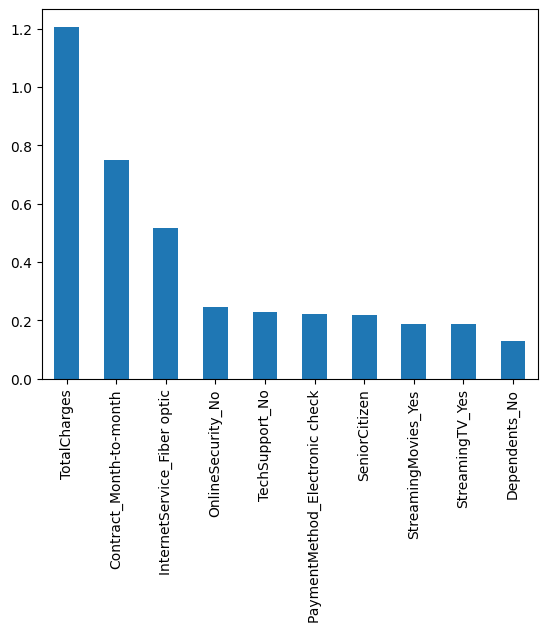

In [39]:
# Visualize the importance of the top 10 variables correlated to churn being 1
weights = pd.Series(model.coef_[0],
                    index=X.columns.values)
print(weights.sort_values(ascending=False)[:10].plot(kind='bar'))

Axes(0.125,0.11;0.775x0.77)


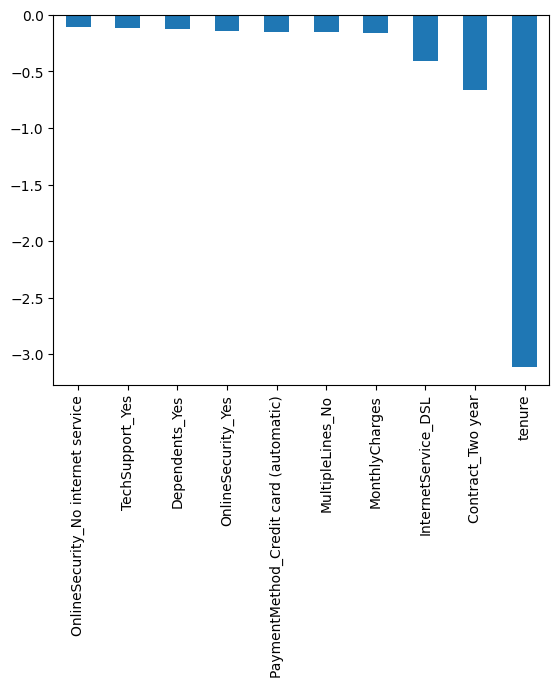

In [40]:
# Visualize the importance of the top 10 variables correlated to churn being 0

print(weights.sort_values(ascending=False)[-10:].plot(kind='bar'))

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

<Figure size 1100x1100 with 0 Axes>

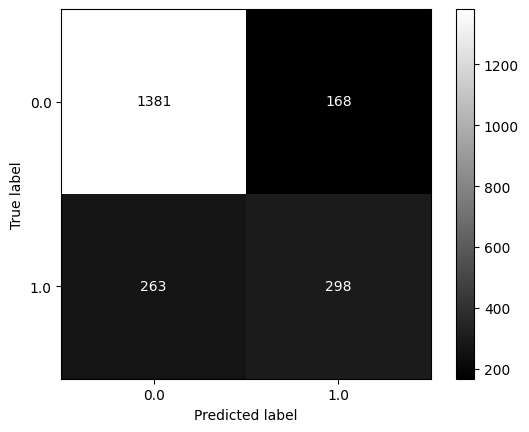

In [42]:
# Confusion matrix to understand what the accuracy means
fig = plt.figure(figsize=(11,11))
cm = confusion_matrix(y_test, prediction_test, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_)
disp.plot(cmap='gray')
plt.show()

## Fixing the imbalance
Cuando se analiza la distribución de datos se observa que los valores NO representan el 73% de todos los datos lo cual hace que el balance sea muy desproporcionado

In [45]:
df_data['Churn'].value_counts(normalize=True)*100

0    73.421502
1    26.578498
Name: Churn, dtype: float64

In [48]:
from sklearn.metrics import classification_report
predictions = model.predict(X_test).reshape(-1,1)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.84      0.89      0.87      1549
         1.0       0.64      0.53      0.58       561

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110



In [54]:
# Balancing the data

from imblearn.combine import SMOTEENN

imp = SMOTEENN(sampling_strategy=0.99)

X_bal,y_bal = imp.fit_resample(X,y)

# Finding how the data is distributed after balancing

#(y_bal.value_counts()/y_bal.shape[0])*100

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_bal,y_bal, test_size=0.3, random_state=42)
model = LogisticRegression(max_iter=1000)
result = model.fit(X_train, y_train)
prediction_test = model.predict(X_test)
print(metrics.accuracy_score(y_test,prediction_test ))

0.8967952199891364


In [57]:
predictions = model.predict(X_test).reshape(-1,1)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.89      0.88      0.89       839
         1.0       0.90      0.91      0.91      1002

    accuracy                           0.90      1841
   macro avg       0.90      0.90      0.90      1841
weighted avg       0.90      0.90      0.90      1841



## Regularizers

Esta técnica consiste en disminuir la complejidad de nuestro modelo a través de una penalización aplicada a sus variables más irrelevantes.

Para este ejemplo compararemos los resultados obtenidos con los distintos métodos de regularización usando la misma semilla y el mismo solver (saga)

### Regularizer type

###L1 Lasso

Reduce la complejidad a través de eliminación de features que no aportan demasiado al modelo.
Penaliza a los features que aporta poca información volviéndolos cero, eliminado el ruido que producen en el modelo.

> C es un parámetro que define que tanto se penaliza a los features que menos aportan, debe ser siempre un valor positivo y mientras mas pequeño mayor sera la penalización

In [63]:
lasso=LogisticRegression(max_iter=10000, penalty='l1',solver='saga',C=0.5)
lasso.fit(X_train, y_train)
lasso.score(X_test,y_test)

0.7962085308056872

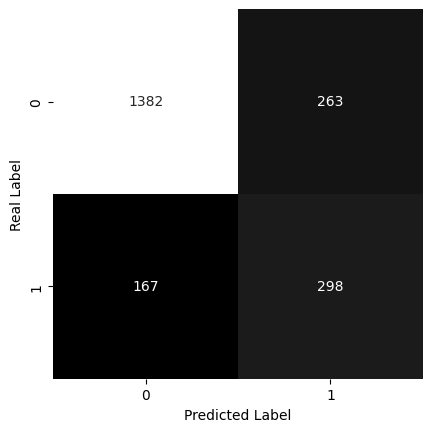

In [64]:
cm=confusion_matrix(lasso.predict(X_test),y_test)
sns.heatmap(
    cm,
    annot=True,
    cmap='gray',
    cbar=False,
    square=True,
    fmt="d"
    )
plt.ylabel('Real Label')
plt.xlabel('Predicted Label');

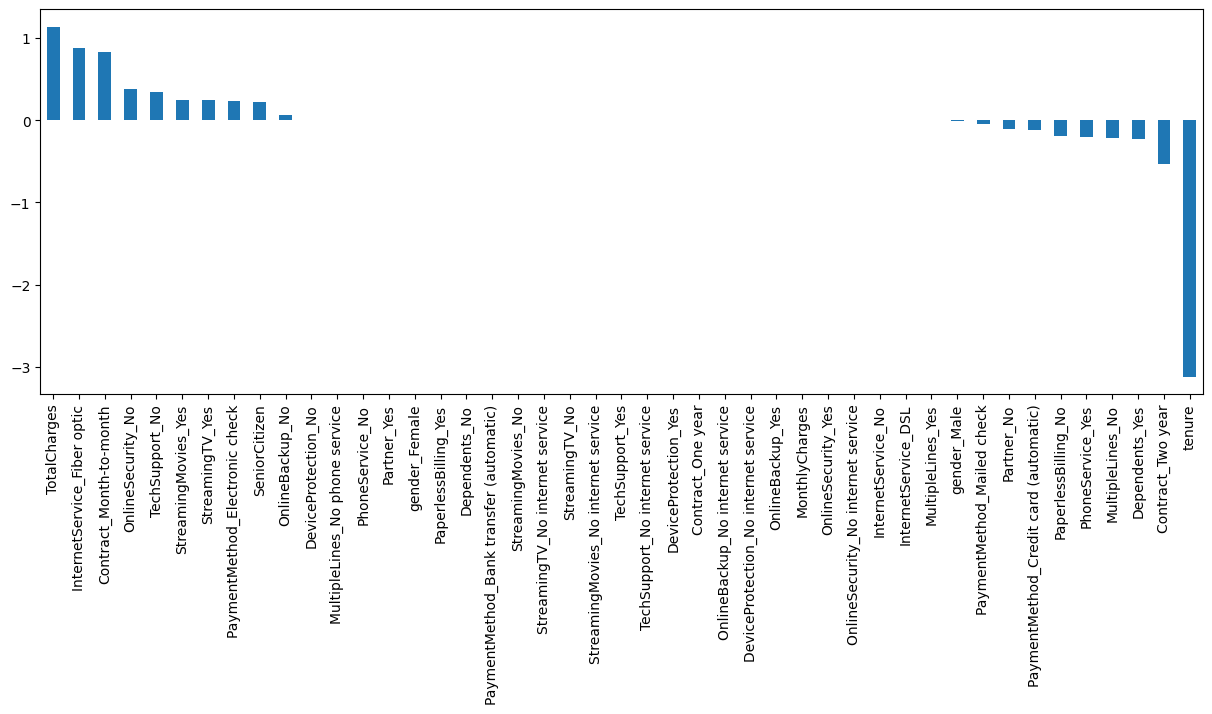

In [65]:
weights = pd.Series(lasso.coef_[0], index=X.columns.values).sort_values(ascending=False)
fig = plt.figure(figsize=(15,5))
weights.plot(kind='bar');

In [66]:
# Parameters turned into 0
weights[weights==0]

StreamingMovies_No                      0.0
StreamingTV_No internet service         0.0
StreamingTV_No                          0.0
StreamingMovies_No internet service     0.0
TechSupport_Yes                         0.0
TechSupport_No internet service         0.0
DeviceProtection_Yes                    0.0
Contract_One year                       0.0
OnlineBackup_No internet service        0.0
DeviceProtection_No internet service    0.0
OnlineBackup_Yes                        0.0
MonthlyCharges                          0.0
OnlineSecurity_Yes                      0.0
OnlineSecurity_No internet service      0.0
InternetService_No                      0.0
InternetService_DSL                     0.0
MultipleLines_Yes                       0.0
dtype: float64

### L2 Ridge

Reduce la complejidad disminuyendo el impacto de ciertos features a nuestro modelo.
Penaliza los features poco relevantes, pero no los vuelve cero. Solamente limita la información que aportan a nuestro modelo.

In [67]:
ridge=LogisticRegression(max_iter=10000, penalty='l2',solver='saga',C=0.5)
ridge.fit(X_train, y_train)
ridge.score(X_test,y_test)

0.7966824644549763

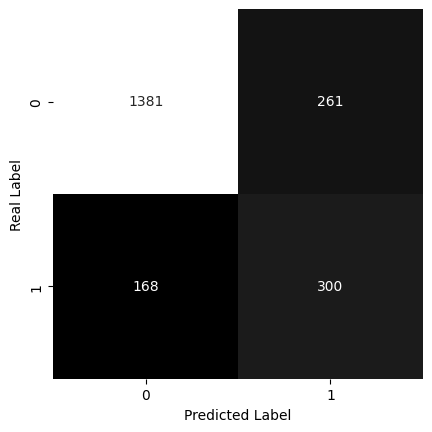

In [68]:
cm=confusion_matrix(ridge.predict(X_test),y_test)
sns.heatmap(
    cm,
    annot=True,
    cmap='gray',
    cbar=False,
    square=True,
    fmt="d"
    )
plt.ylabel('Real Label')
plt.xlabel('Predicted Label');

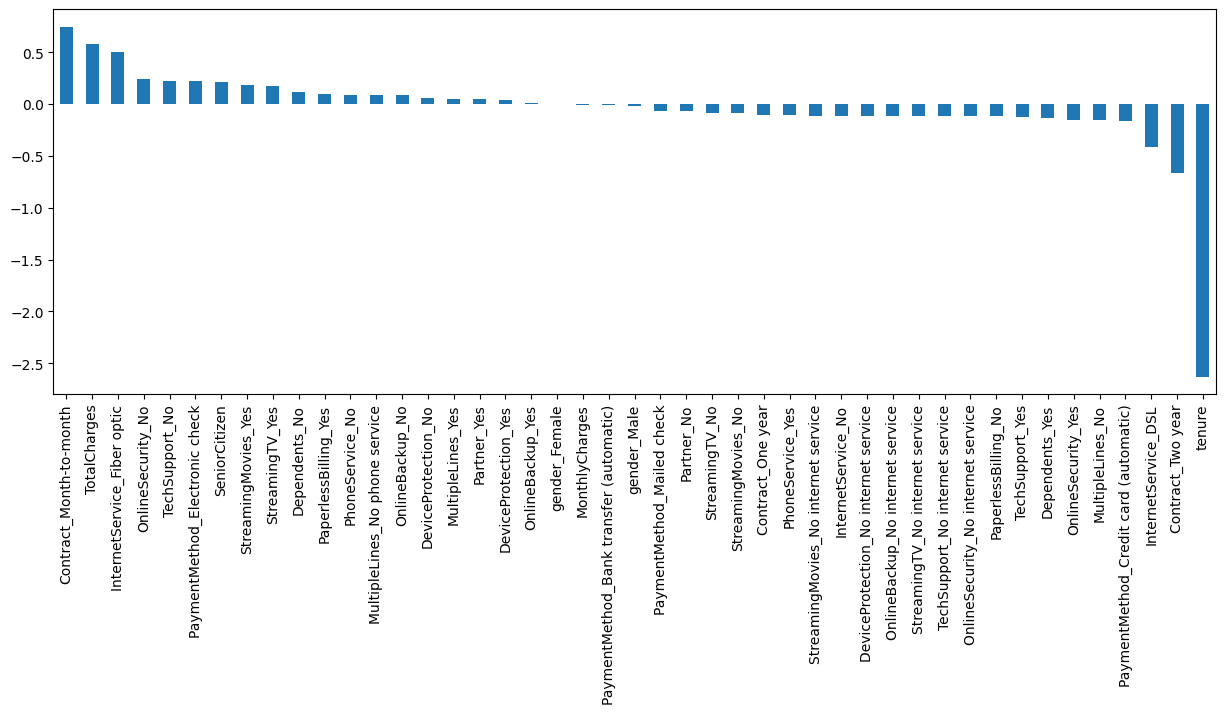

In [69]:
weights = pd.Series(ridge.coef_[0], index=X.columns.values).sort_values(ascending=False)
fig = plt.figure(figsize=(15,5))
weights.plot(kind='bar');

### Lasso vs Ridge

1. No hay un campeón definitivo para todos los problemas.
2. Si hay pocos features que se relacionen directamente con la variable a predecir: Probar Lasso.
3. Si hay varios features relacionados con la variable a predecir: Probar Ridge.

Para aplicarlos y decidir cuál es el mejor en la práctica, podemos probar usando alguna técnica como cross-validation iterativamente. o bien, podemos combinarlos

### ElasticNet: Una técnica intermedia:

Hasta el momento hemos detallado dos técnicas de regularización en las cuales añadimos un componente de penalización en el proceso donde encontramos los valores de los parámetros 𝛽 minimizando la función de error.

Es común encontrarnos en la literatura con un camino intermedio llamado ElasticNet. Esta técnica consiste en combinar las dos penalizaciones anteriores en una sola función.

Cuando usamos ElasticNet:

1. Tenemos una forma de probar ambas L1 y L2 al tiempo sin perder información.
2. Supera las limitaciones individuales de ellas.
3. Si hace falta experiencia, o el conocimiento matemático de fondo, puede ser la opción preferente para probar la regularización.

> Para implementar ElasticNet ahora vamos a usar l1_ratio el cual puede tomar valores entre 0 a 1. Si l1_ratio = 0 , ElasticNet se comportará como Ridge, y si l1_ratio = 1 , se comportará como Lasso. Por lo tanto, nos brinda todo el espectro lineal de posibles combinaciones entre estos dos extremos.

En este caso simplemente vamos a comparar el accuracy que obtenemos con distintos valores de l1_ratio:

In [70]:
val_c=np.arange(0,1,0.01)
acc=[]
for i in val_c:
    acc.append(LogisticRegression(max_iter=10000, penalty='elasticnet',solver='saga',l1_ratio=i).fit(X_train, y_train).score(X_test,y_test))

Ahora podemos crear una gráfica de  como se comportó nuestro accuracy on distintos valores de l1_ratio

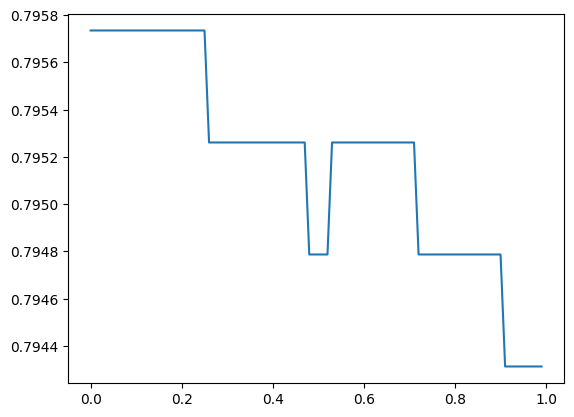

In [71]:
plt.plot(val_c,acc);

Igualmente recordemos que se calculó el accuracy con una sola iteración y que para realmente comparar estos valores debemos usar mejores estrategias de validación como Cross-validation